**Import library need by the project**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

**Read data from CSV and display the summary**

In [2]:
wines = pd.read_csv('wine_data.csv', sep=',')

wines.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,3
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.40,3
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.70,3
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.90,3
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.00,3
5,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.90,3
6,6.8,0.815,0.00,1.20,0.267,16.0,29.0,0.99471,3.32,0.51,9.80,3
7,7.3,0.980,0.05,2.10,0.061,20.0,49.0,0.99705,3.31,0.55,9.70,3
8,7.1,0.875,0.05,5.70,0.082,3.0,14.0,0.99808,3.40,0.52,10.20,3
9,6.7,0.760,0.02,1.80,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3


In [3]:
wines.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,53981.000000,53983.000000,53987.000000,53991.000000,53992.000000,53994.000000,53994.000000,53994.000000,53981.000000,53990.000000,53994.000000,53994.000000
mean,8.810629,0.661865,0.613222,20.733765,0.146368,92.544423,185.255147,1.006522,3.181488,0.837969,10.979667,5.930400
std,2.395040,0.396537,0.386675,19.215359,0.118897,76.056337,102.335831,0.013507,0.170283,0.401059,1.239853,1.663418
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.900000,0.295000,0.300000,2.800000,0.047000,27.000000,106.000000,0.994880,3.060000,0.500000,10.000000,5.000000
50%,8.210000,0.600000,0.500000,12.750000,0.097000,61.200000,171.000000,1.002718,3.170000,0.730000,10.998413,6.000000
75%,10.550000,0.995000,0.940000,38.900000,0.231000,158.700000,266.200000,1.017800,3.290000,1.160000,11.900000,7.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


**Observe the variable type. quality could be decrete variable and rest variable could be continuous**

In [4]:
for i, col in enumerate(list(wines.columns.values)):
    print("Column name: {}, type: {}".format(col, wines[col].dtype))

Column name: fixed_acidity, type: float64
Column name: volatile_acidity, type: float64
Column name: citric_acid, type: float64
Column name: residual_sugar, type: float64
Column name: chlorides, type: float64
Column name: free_sulfur_dioxide, type: float64
Column name: total_sulfur_dioxide, type: float64
Column name: density, type: float64
Column name: pH, type: float64
Column name: sulphates, type: float64
Column name: alcohol, type: float64
Column name: quality, type: int64


**We do not want to have empty data, so check if any column misses data**

In [5]:
wines.isnull().any().any()

True

**Looks like dataset has empty row from the above check, we drop empty rows and check again**

In [6]:
wines = wines.dropna()

wines.isnull().any().any()

False

In [7]:
print("Data count after droping NaN: {}".format(len(wines)))

Data count after droping NaN: 53945


**Based on the histogram, quality is from 3 to 9 and we have 3000 records for each quality level**

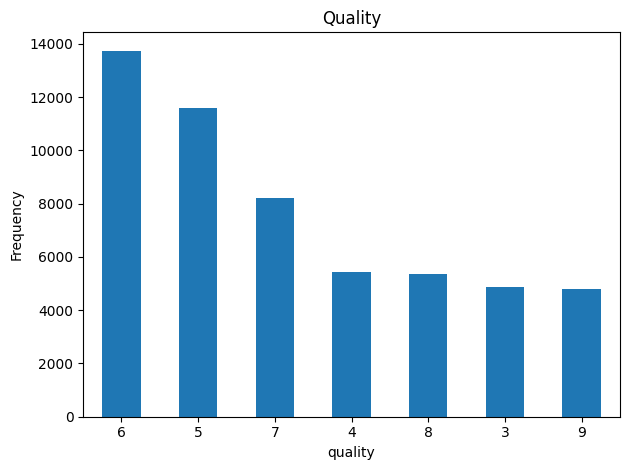

In [ ]:
wines['quality'].value_counts().sort_index().plot(kind='bar', title = 'Quality') 

plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Heatmap to help us to understand correlation. From here, we can understand alcohol is important for quality. The correlation between quality and pH is -0.0032 and some of variables have correlation less than 0.05. Consider not remove to many features, we can consider build model without those variable which are less than 0.045.**

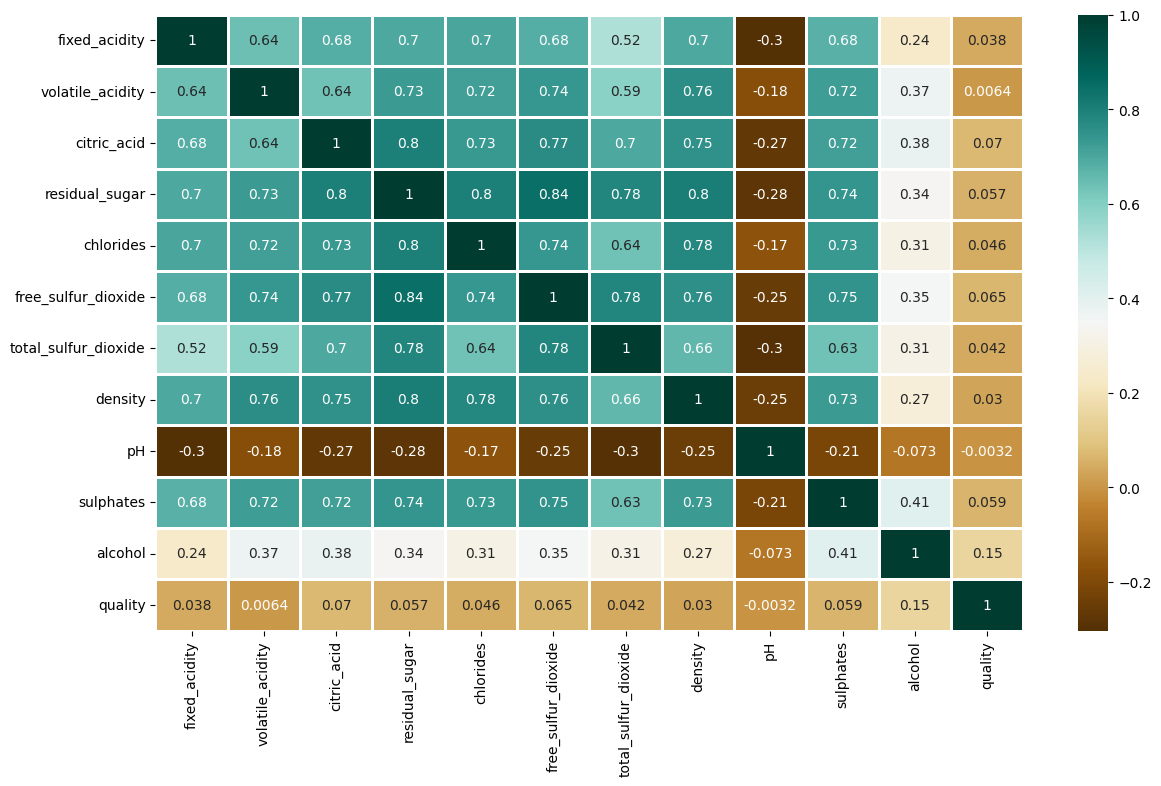

In [11]:
plt.figure(figsize=(14, 8))
sns.heatmap(wines.corr(), cmap = 'BrBG', linewidths = 2, annot = True)
plt.show()

**We want to observe features if any one is much skewed since skewness could affect model prediction**

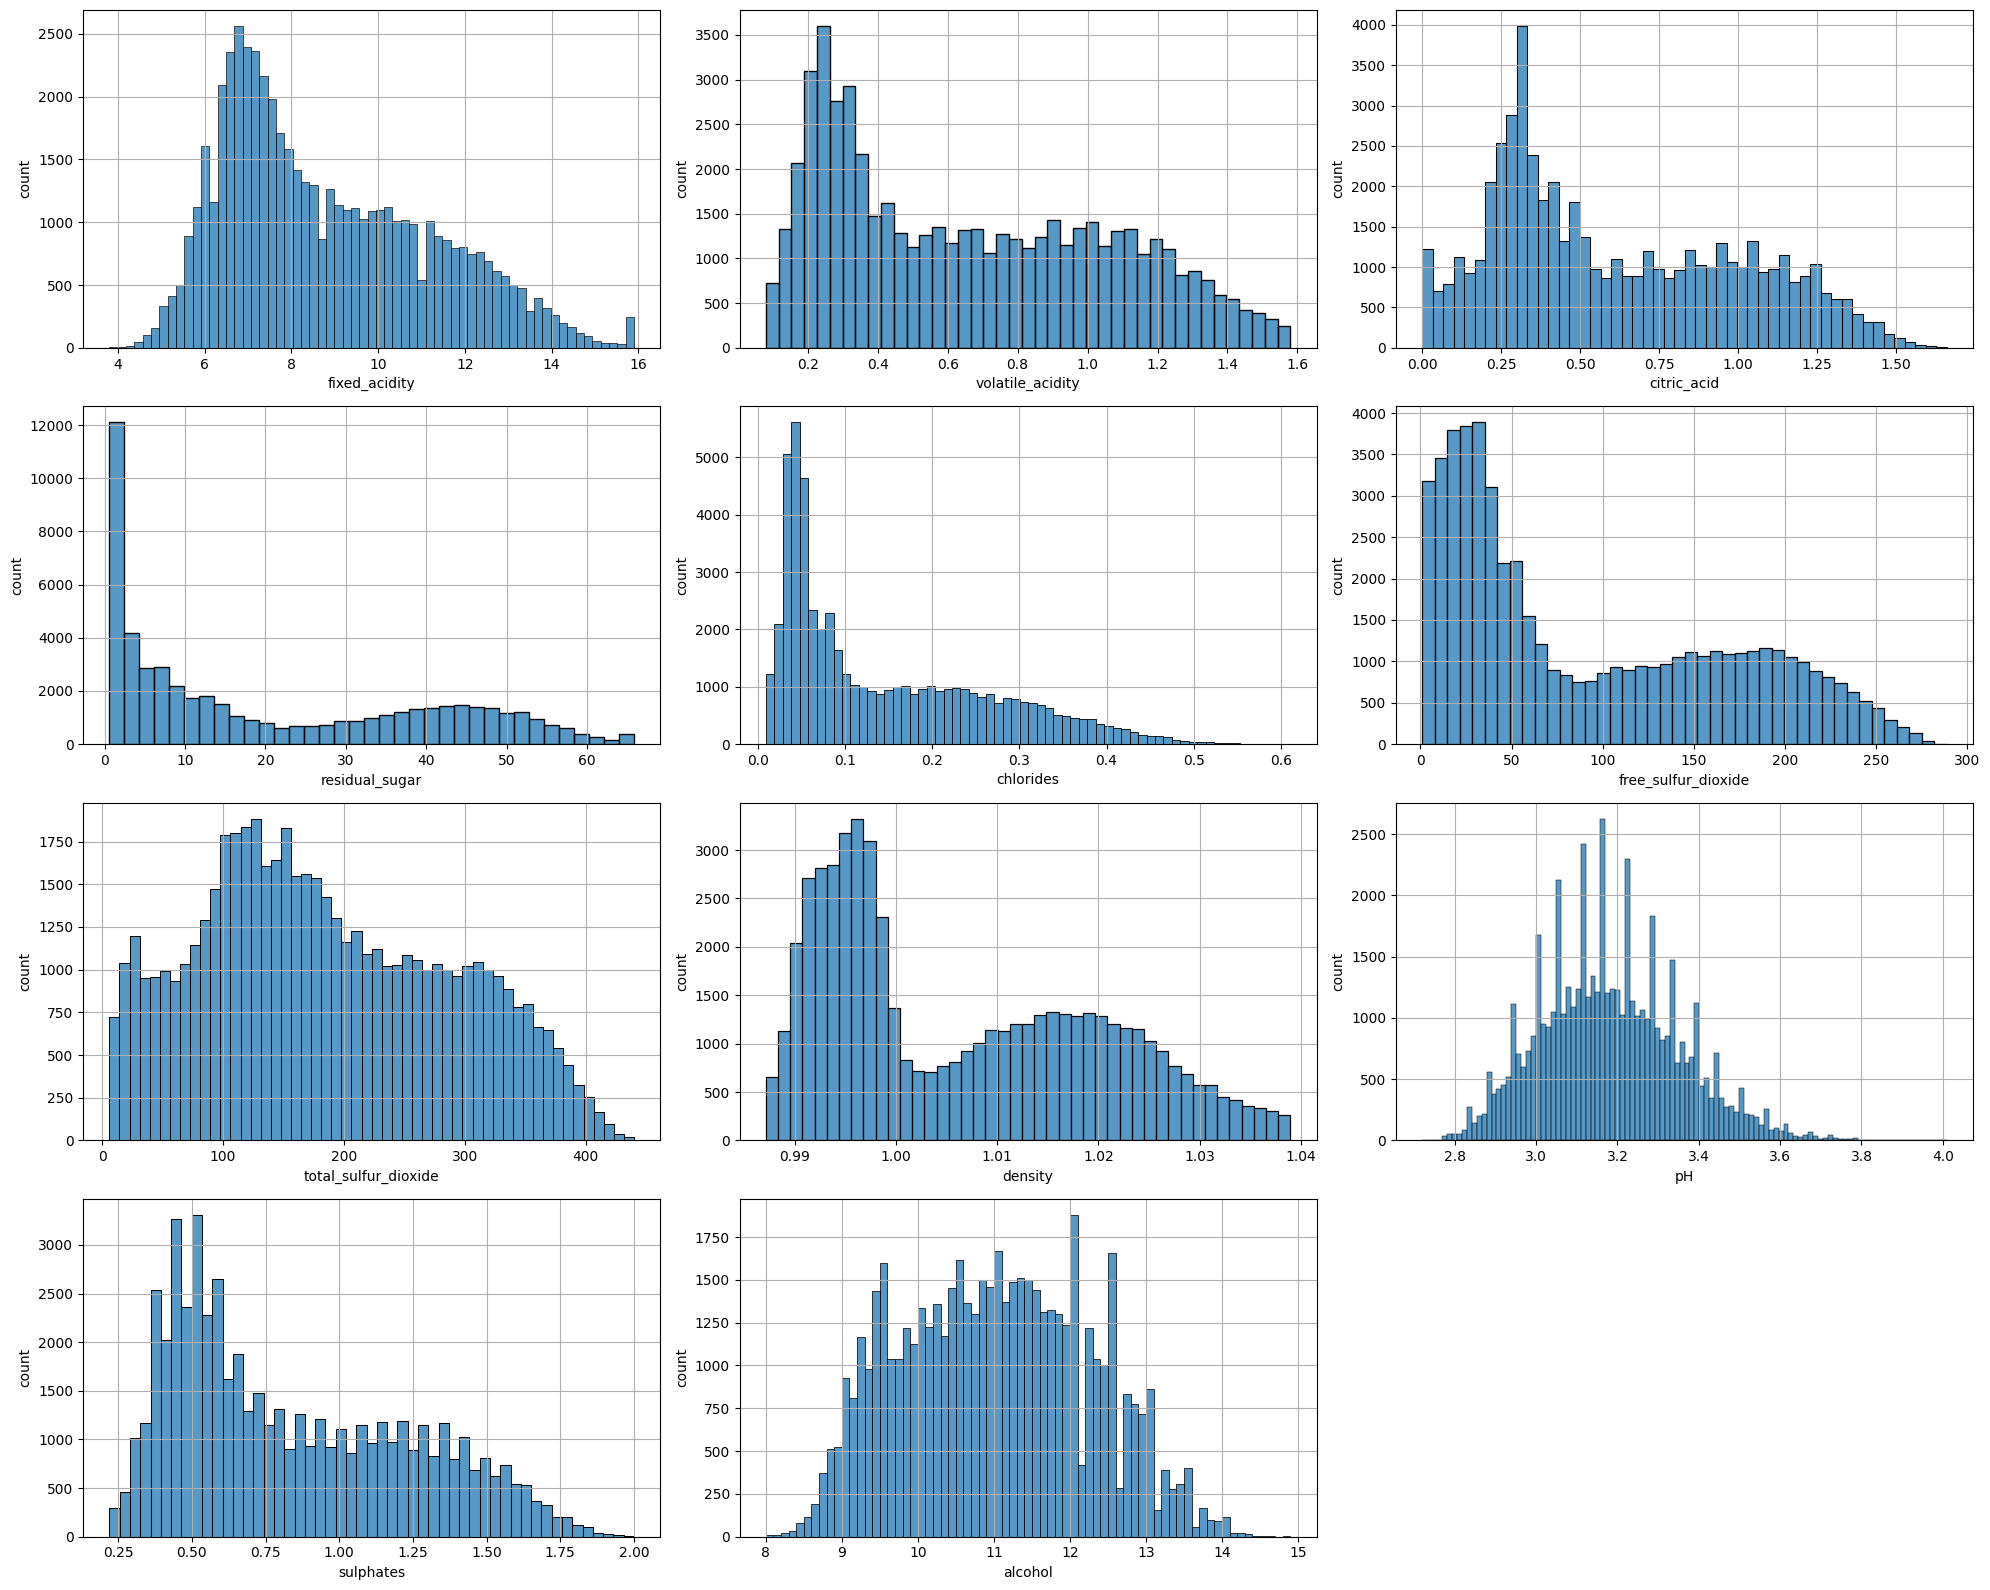

In [12]:
features = wines.drop(columns=['quality'], errors='ignore')

plt.figure(figsize = (20, 16))
for i, col in enumerate(list(features.columns.values)):
    plt.subplot(4, 3, i + 1)
    sns.histplot(data = features[col])
    plt.xlabel(col)
    plt.ylabel('count')
    plt.grid()
    plt.tight_layout()

plt.show()

**KDE to show the probability curve so we can observe the distribution of each feature**

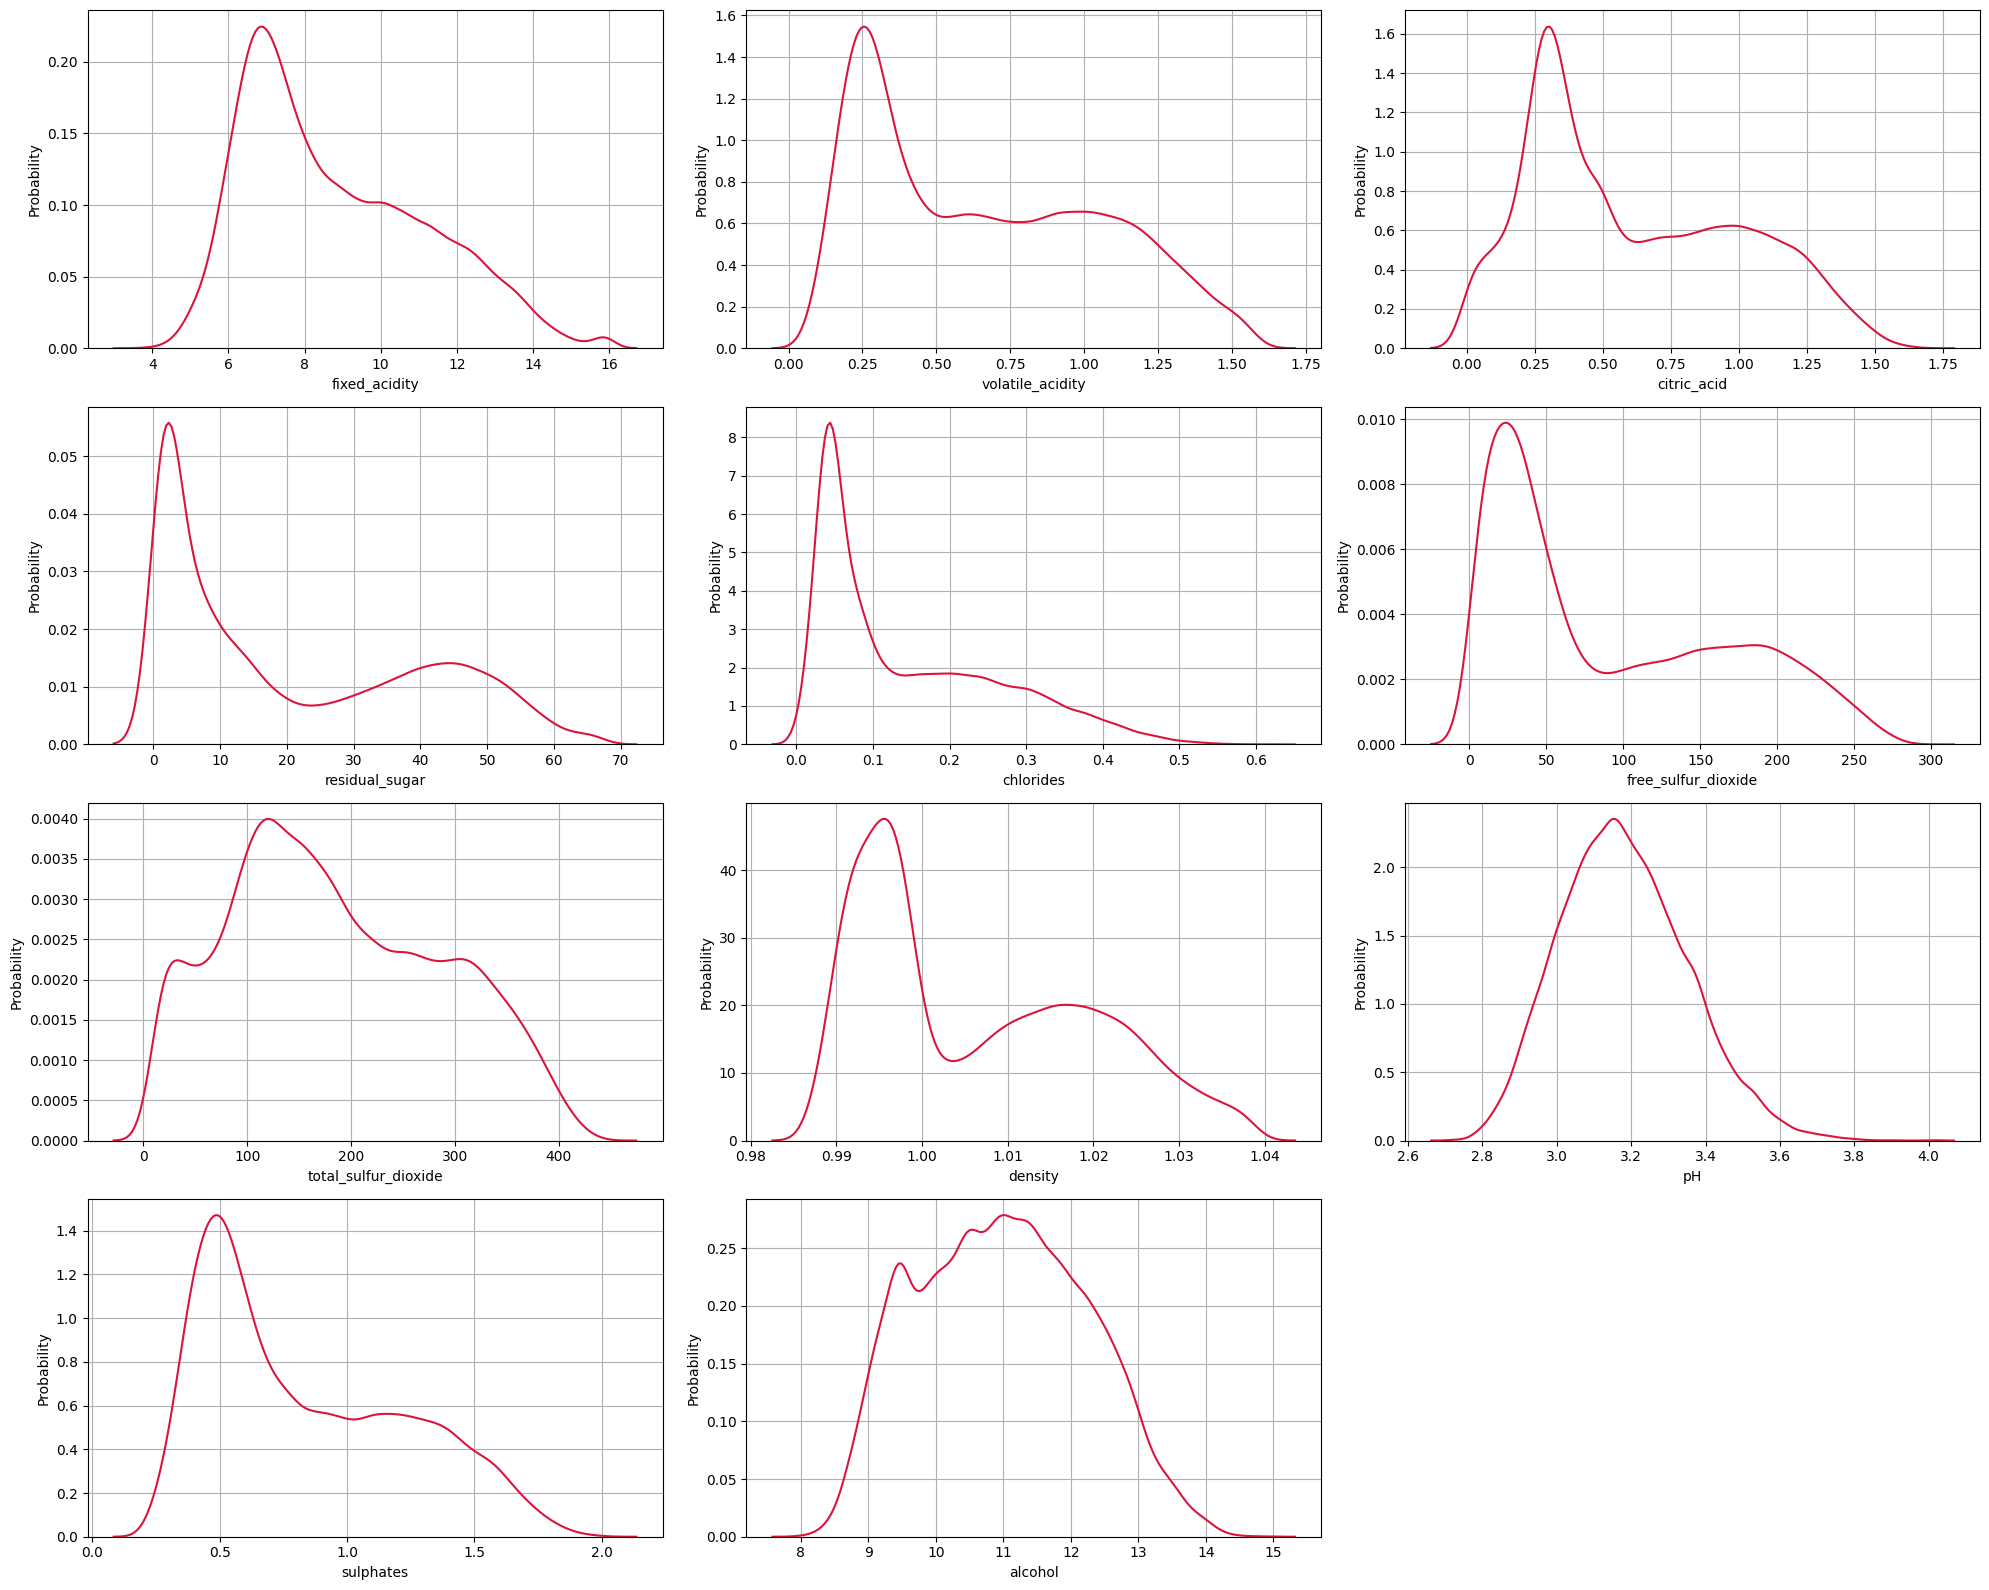

In [13]:
plt.figure(figsize = (20, 16))
for i, col in enumerate(list(features.columns.values)):
    plt.subplot(4, 3, i + 1)
    sns.kdeplot(data = features[col], color = 'crimson')
    plt.xlabel(col)
    plt.ylabel('Probability')
    plt.grid()
    plt.tight_layout()

plt.show()

**We use scatterplot to find if there has outliers that we need to remove**

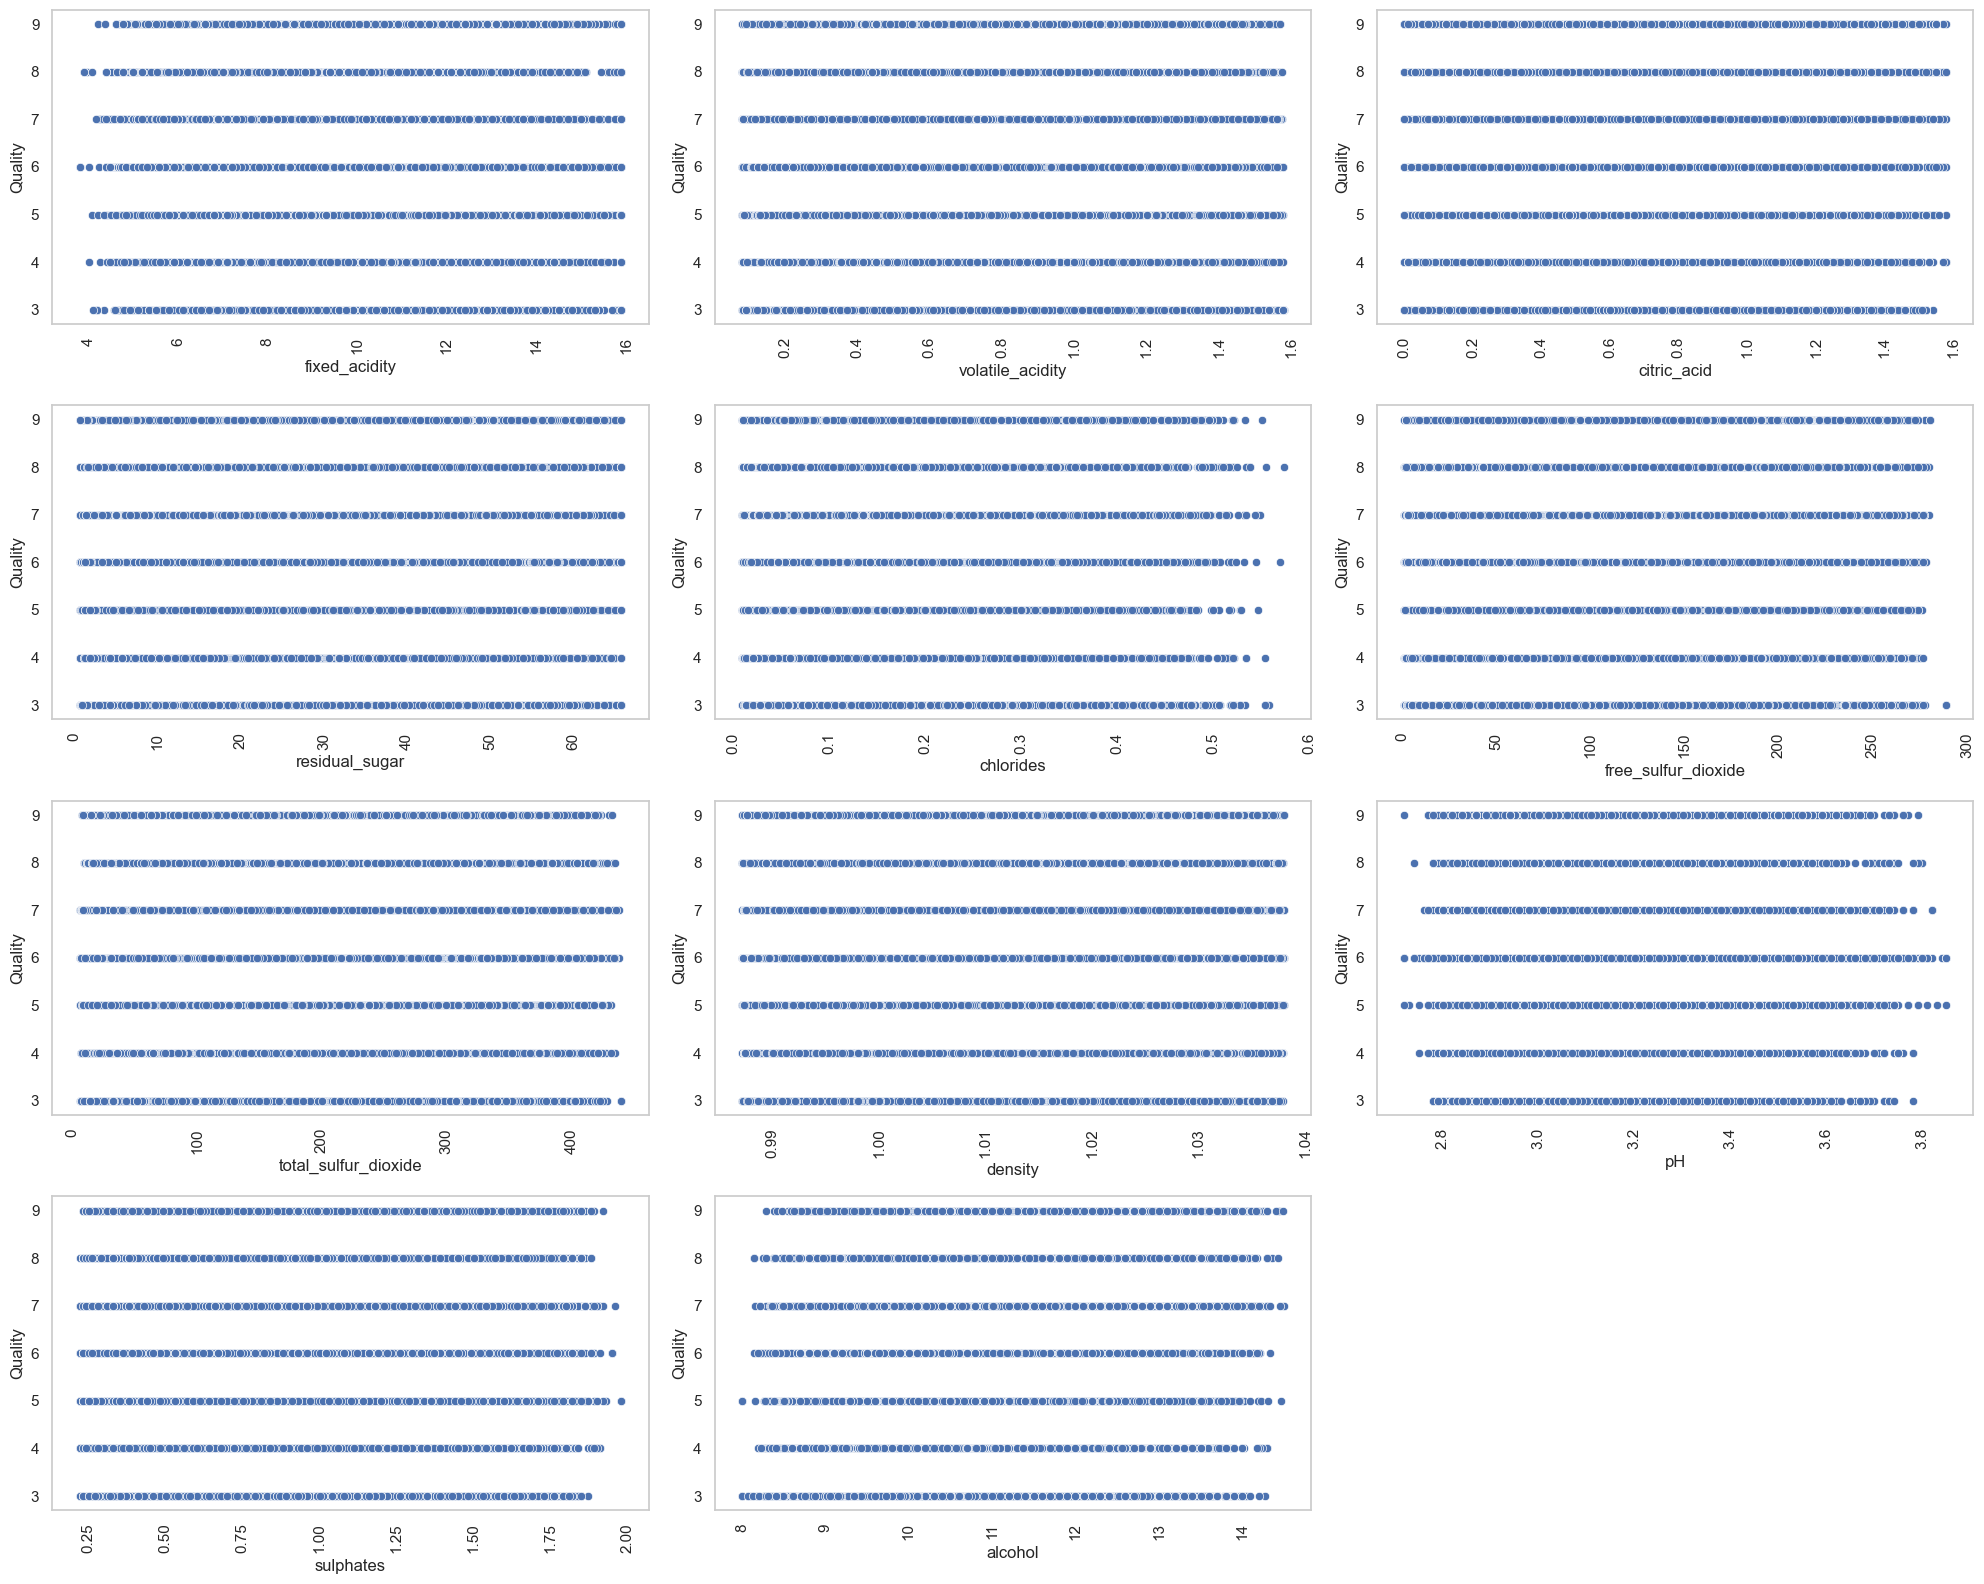

In [22]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (20, 16))
for i, col in enumerate(list(features.columns.values)):
    plt.subplot(4, 3, i + 1)
    sns.scatterplot(x = wines[col], y = wines['quality'], data = wines)
    plt.xlabel(col)
    plt.ylabel('Quality')
    plt.xticks(rotation=90)
    plt.grid()
    plt.tight_layout()

plt.show()

**There has some outliers, so we need to remove**

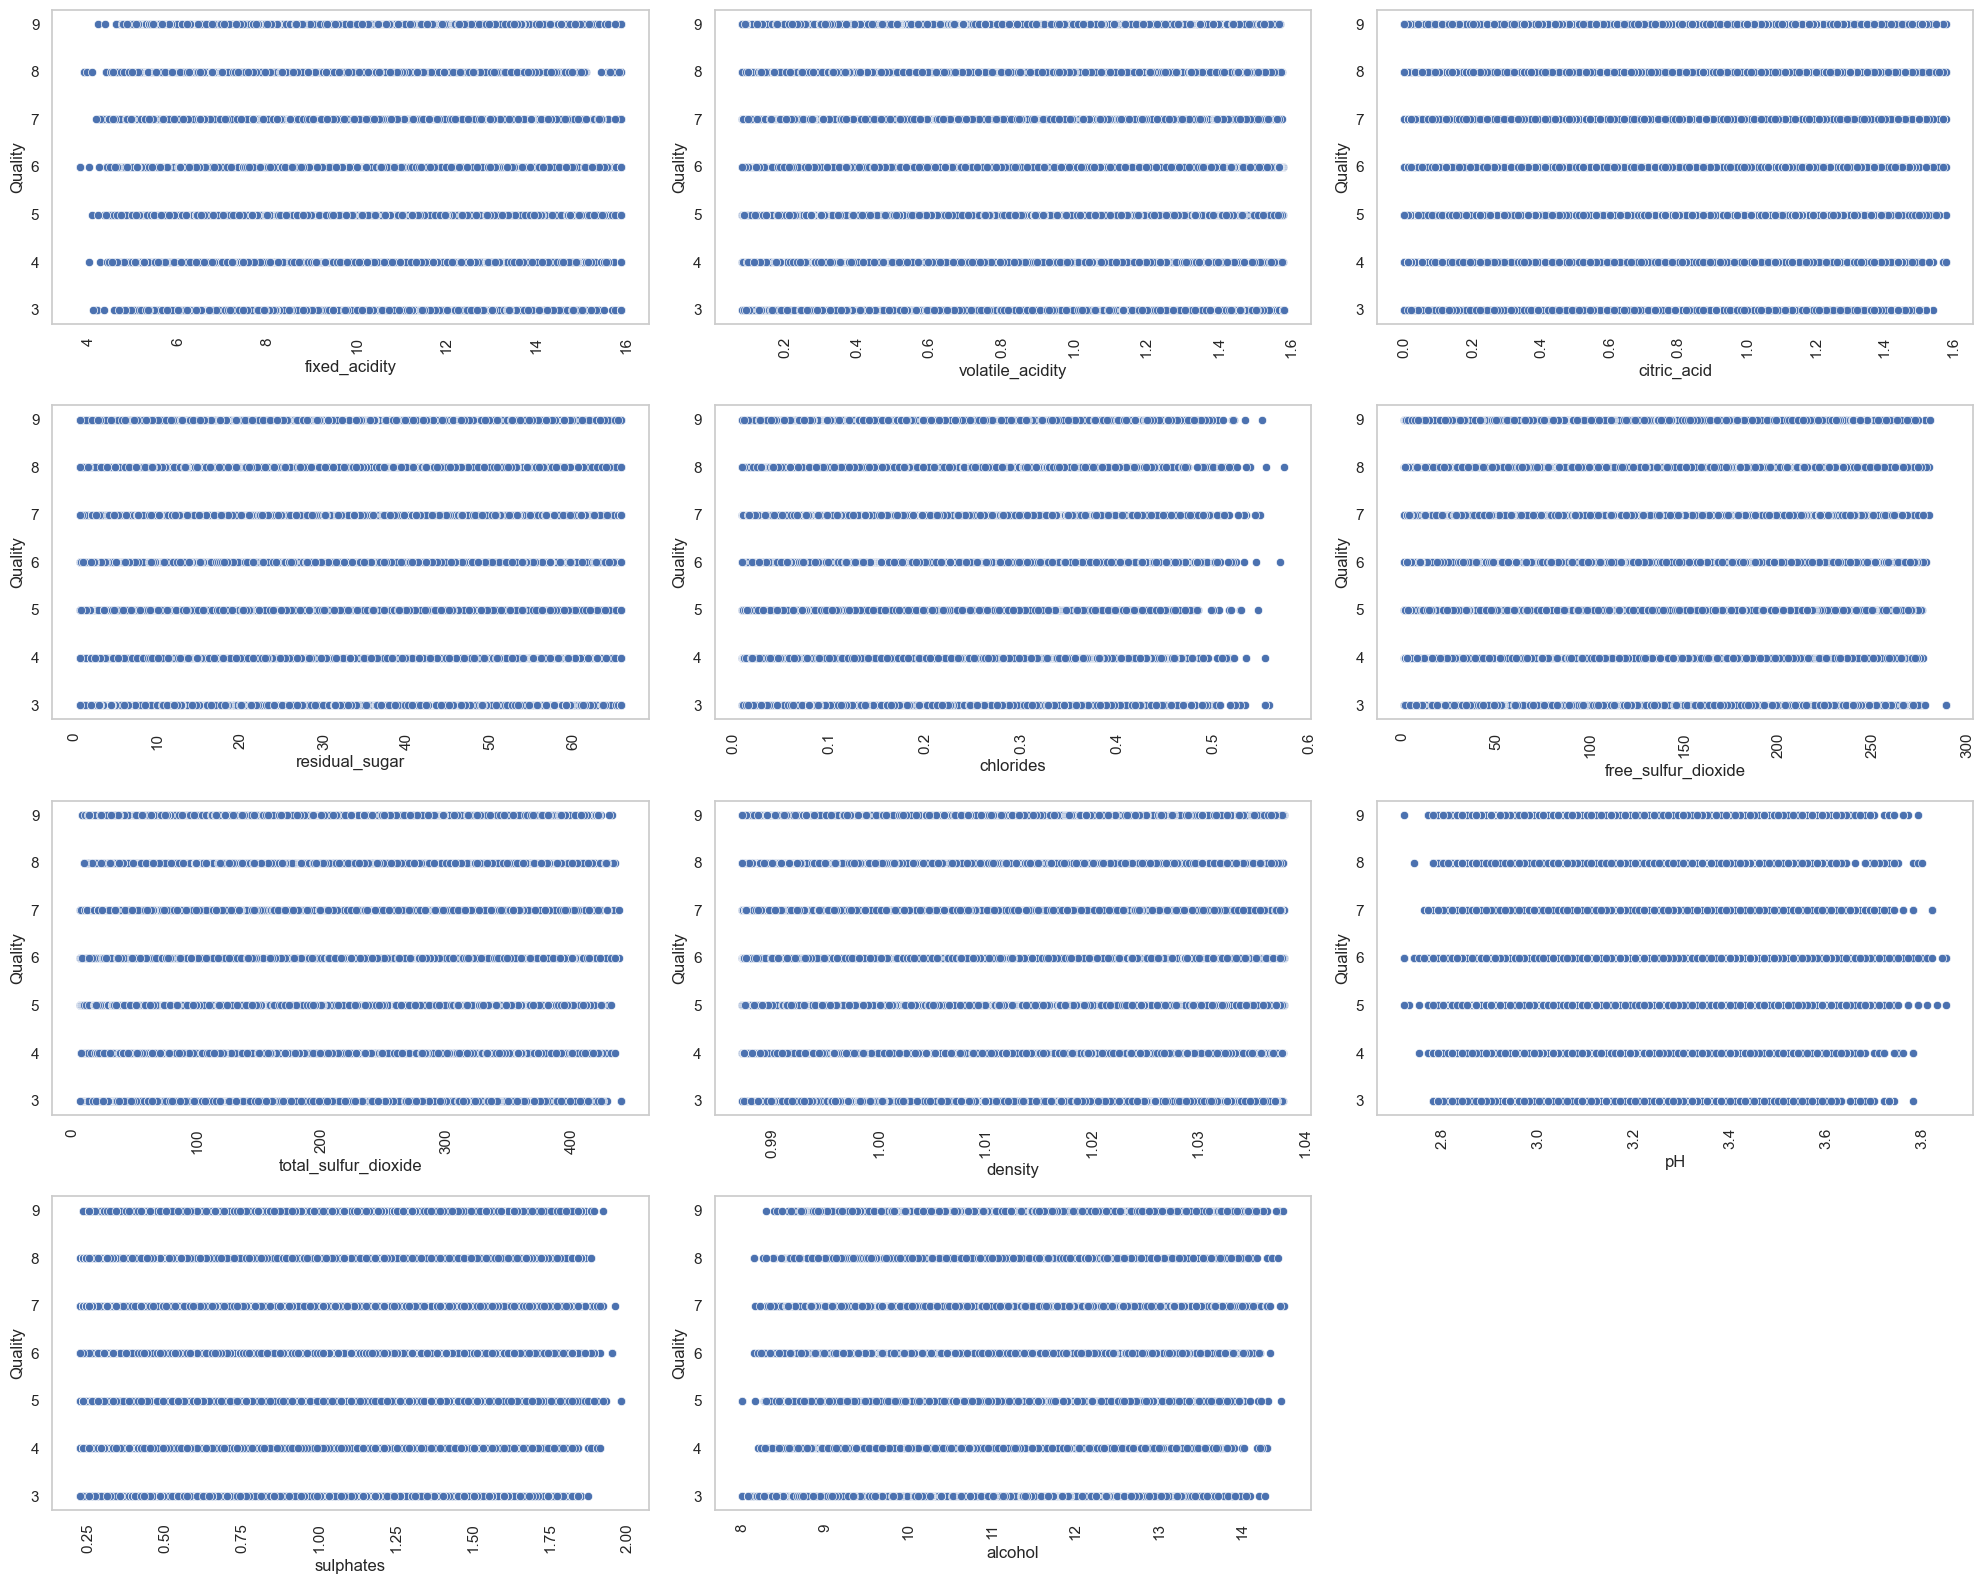

In [15]:
# Remove rows where alcohol > 15
wines = wines.drop(wines[wines['pH'] > 3.85].index)
wines = wines.drop(wines[wines['chlorides'] > 0.6].index)
wines = wines.drop(wines[wines['alcohol'] > 14.5].index)
wines = wines.drop(wines[wines['density'] > 1.038].index)
wines = wines.drop(wines[wines['citric_acid'] > 1.58].index)

sns.set(style = 'whitegrid')
plt.figure(figsize = (20, 16))
for i, col in enumerate(list(features.columns.values)):
    plt.subplot(4, 3, i + 1)
    sns.scatterplot(x = wines[col], y = wines['quality'], data = wines)
    plt.xlabel(col)
    plt.ylabel('Quality')
    plt.xticks(rotation=90)
    plt.grid()
    plt.tight_layout()

plt.show()


**Create smaller dataset for comparison. We only keep the variables have more than 0.045 correlation with quality**

In [16]:
wines_small = wines.drop(['fixed_acidity', 'volatile_acidity', 'total_sulfur_dioxide', 'density', 'pH'], axis = 1)
wines_small.head()

,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,sulphates,alcohol,quality
0,0.66,2.20,0.074,10.0,0.57,9.0,3
1,0.49,2.10,0.200,5.0,0.63,8.4,3
2,0.00,4.25,0.097,5.0,0.54,10.7,3
3,0.42,1.50,0.145,34.0,0.86,9.9,3
4,0.02,3.40,0.084,6.0,0.49,11.0,3


**Shuffle data and split dataset to independent data and target data**

In [17]:
wines = wines.sample(frac=1).reset_index(drop=True)
x = wines.drop(['quality'], axis = 1)
y = wines.filter(['quality'], axis = 1)
print(x.head())
print()
print(y.head())


   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0           8.00             0.859         0.32           44.52      0.139   
1          10.30             1.080         0.53           50.80      0.290   
2           7.30             0.167         0.02            0.63      0.045   
3           9.74             0.388         0.39            4.51      0.328   
4           8.28             0.350         0.98           15.77      0.087   

   free_sulfur_dioxide  total_sulfur_dioxide   density    pH  sulphates  \
0                170.3                 194.6  1.030366  3.33       1.22   
1                 84.2                 345.0  1.003560  3.17       1.38   
2                  1.4                   9.9  0.988565  3.22       0.43   
3                 58.1                 171.2  1.007937  3.46       0.71   
4                153.0                 297.4  1.000244  3.06       0.62   

     alcohol  
0  10.027619  
1  13.800000  
2   9.569703  
3   9.268979  
4  10

In [18]:
wines_small = wines_small.sample(frac=1).reset_index(drop=True)
small_x = wines_small.drop(['quality'], axis = 1)
small_y = wines_small.filter(['quality'], axis = 1)

print(small_x.head())
print()
print(small_y.head())

   citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  sulphates  \
0         0.36            4.51      0.020                 41.9       0.41   
1         0.12            1.80      0.114                 15.0       0.59   
2         0.31            2.80      0.047                 40.0       0.64   
3         0.41           17.80      0.046                 39.0       0.39   
4         0.23            2.60      0.059                  5.0       0.56   

     alcohol  
0  11.304216  
1   9.500000  
2  10.900000  
3   8.700000  
4  11.300000  

   quality
0        9
1        6
2        7
3        5
4        5


**Splitting the dataset into 80% training and 20% testing**

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 0)

print("Shape of x_train: {}".format(x_train.shape))
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of y_test: {}".format(y_test.shape))


Shape of x_train: (42952, 11)
Shape of x_test: (10739, 11)
Shape of y_train: (42952, 1)
Shape of y_test: (10739, 1)


In [20]:
small_x_train, small_x_test, small_y_train, small_y_test = train_test_split(small_x, small_y, train_size = 0.8, test_size = 0.2, random_state = 0)

print("Shape of small_x_train: {}".format(small_x_train.shape))
print("Shape of small_x_test: {}".format(small_x_test.shape))
print("Shape of small_y_train: {}".format(small_y_train.shape))
print("Shape of small_y_test: {}".format(small_y_test.shape))

Shape of small_x_train: (42952, 6)
Shape of small_x_test: (10739, 6)
Shape of small_y_train: (42952, 1)
Shape of small_y_test: (10739, 1)
